  0 :  2
  1 :  3
  2 :  4
  3 :  5
  4 :  5
  5 :  2
  6 :  6
  7 :  4
  8 :  3
  9 :  5
  10 :  3


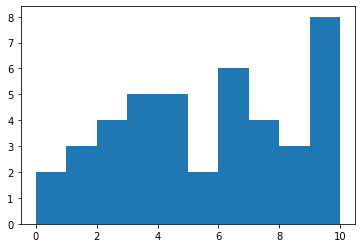

[0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10]


In [69]:

import matplotlib.pyplot as plt
import numpy as np
import json
def CountFrequency(my_list): 
  
    freq = {} 
    my_list.sort()
    #先sort dictionary
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

    for key, value in freq.items(): 
        print (*[" ", key, ": ", value]) 
  # % format; d, integer %d = interger; %f20=保留两位小数
  # * = operator,全部变为object，格式化成str
    return freq;

my_list =[2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3] 
SetFrequency = CountFrequency(my_list)

plt.hist(my_list) 
plt.show()

json_object = json.dumps(my_list)
print(json_object)

In [67]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head(1)

df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]
office.shape

office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

office['Duration'].sum()
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

%matplotlib inline
import matplotlib
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)


office_by_day = office['weekday'].value_counts()
office_by_day = office_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)


office_by_hour = office['hour'].value_counts()
office_by_hour = office_by_hour.sort_index()
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')



FileNotFoundError: [Errno 2] No such file or directory: 'ViewingActivity.csv'